In [1]:
# kart
# https://kartkatalog.geonorge.no/metadata/administrative-enheter-kommuner/041f1e6e-bdbc-4091-b48f-8a5990f3cc5b
# Hele landet - GeoJSON - EUREF89 UTM sone 33, 2d  

# lastet ned manuelt

In [27]:
from pathlib import Path
import json
import zipfile
import geopandas as gpd
import janitor

In [28]:
layer = "041f1e6e-bdbc-4091-b48f-8a5990f3cc5b"
fmt = "GeoJSON"
srid = "25833"

def kommuner_geojson():
    p = Path("data/Basisdata_0000_Norge_25833_Kommuner_GeoJSON.zip")
    with zipfile.ZipFile(p) as zf:
        with zf.open(zf.namelist()[0]) as f:
            data = json.loads(f.read().decode('utf-8'))
    return json.dumps(data['administrative_enheter.kommune'])

In [29]:
df_kommune = kommuner_geojson()

In [49]:
cols = ['geometry', 'kommunenummer', 'navn']
df = (
    gpd.GeoDataFrame.from_file(df_kommune, driver=fmt)
    .select_columns(cols)
    .transform_column('navn', lambda x: str(json.loads(x)[0]['navn']))
    .assign(areal=lambda x: x.geometry.area)
    # virker som om noen kommuner har samme nummer, til tross for å ha 
    # fjerner duplikat kommunenummer, antar minste duplikat er utdatert 
    .sort_values(by='areal', ascending=False)
    .drop_duplicates("kommunenummer") 
)

In [50]:
df

,geometry,kommunenummer,navn,areal
298,"POLYGON ((784162.220 7725076.110, 784159.220 7...",5430,Guovdageaidnu,9.727135e+09
297,"POLYGON ((861972.350 7839433.590, 861112.340 7...",5436,Porsanger,6.012753e+09
184,"POLYGON ((701859.740 7853460.760, 680484.030 7...",5423,Karlsøy,5.887710e+09
286,"POLYGON ((915453.820 7890836.480, 914748.500 7...",5438,Lebesby,5.751431e+09
101,"POLYGON ((865338.580 7743525.740, 865327.150 7...",5437,Kárášjohka,5.469609e+09
...,...,...,...,...
352,"POLYGON ((277667.330 6599802.580, 277673.970 6...",3015,Skiptvet,1.012415e+08
123,"POLYGON ((-40878.870 6586533.480, -43609.910 6...",1127,Randaberg,9.130072e+07
3,"POLYGON ((273329.190 6668128.340, 273360.200 6...",3032,Gjerdrum,8.322558e+07
340,"POLYGON ((277296.040 6645375.660, 277280.210 6...",3027,Rælingen,7.170913e+07


In [51]:
df.to_parquet('data/kart.parquet')

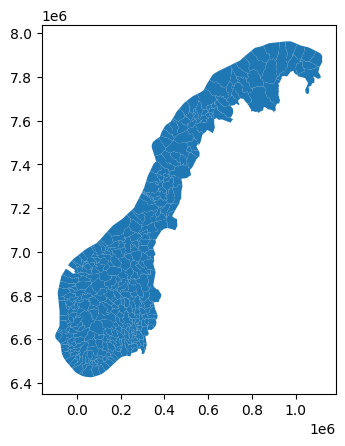

In [52]:
ax = df.plot()

In [26]:
# df.explore()